### Step 4: Performance Visualization

We visualized the model’s performance using confusion matrices and ROC curves. These plots offer insights into sensitivity, specificity, and overall classification quality.


#  Step 4: Model Performance Visualization

In this section, we visualize the performance of the machine learning models trained to distinguish lung cancer samples from normal ones using miRNA and cfDNA methylation features.

Visualization helps us better interpret and communicate the model's strengths, weaknesses, and overall behavior.


##  Confusion Matrix

A confusion matrix provides insight into the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) made by the model.

We use this matrix to evaluate classification accuracy and error types.

- **TP:** Correctly predicted cancer samples  
- **TN:** Correctly predicted normal samples  
- **FP:** Normal predicted as cancer (False alarm)  
- **FN:** Cancer predicted as normal (Missed diagnosis – most critical)



##  ROC Curve (Receiver Operating Characteristic)

The ROC curve visualizes the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) across various threshold settings.

- AUC (Area Under Curve) closer to 1.0 indicates excellent model performance.
- AUC of 0.5 represents a random classifier.

We plotted ROC curves for Logistic Regression, Random Forest, and SVM models to compare their classification power.



## Feature Importance (for Tree-based Models)

Tree-based models like Random Forest can rank features by how useful they were in splitting data.

This visualization highlights which biomarkers (miRNAs or CpGs) contributed the most to model decisions.

This can be useful in identifying potential **biological markers** of early-stage lung cancer.



## Saved Visual Outputs

All visual plots are automatically saved in the `results/plots/` directory for future reference and report inclusion.

- `confusion_matrix_lr.png`
- `roc_curve_all_models.png`
- `feature_importance_rf.png`



###  Step 1: Import Required Libraries

We begin by importing all necessary libraries for data handling, preprocessing, model training, evaluation, and visualization. This includes libraries like `pandas` and `numpy` for data manipulation, `scikit-learn` for machine learning models and performance metrics, `matplotlib` and `seaborn` for plotting, and `joblib` for model saving and loading.


In [6]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score
)


###  Step 2: Load and Prepare the Dataset

In this step, we load the preprocessed and labeled dataset, separate the features (`X`) from the target labels (`y`), and prepare the data for machine learning. Missing values are handled using mean imputation, and all features are standardized using `StandardScaler` to ensure uniformity. Finally, the dataset is split into training and testing sets using an 80/20 ratio while maintaining class distribution through stratification.


In [7]:

# STEP 2: Load Dataset
df = pd.read_csv(r"C:/Users/sanja/cfDNA_LungCancer_ML/data/processed/merged_labeled_light.csv", index_col=0)

X = df.drop(columns=['Label'])
y = df['Label']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)


###  Step 3: Train Machine Learning Models

In this step, we train three supervised machine learning models on the training data: **Logistic Regression**, **Random Forest Classifier**, and **Support Vector Machine (SVM)** with an RBF kernel. These models are selected to compare linear and non-linear approaches to classifying lung cancer based on cfDNA methylation and miRNA expression profiles.


In [8]:
# STEP 3: Train Models
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)


SVC(probability=True)

### Step 4: Predictions and Probabilities
After training the models, we generate predictions on the test dataset. For each model, we compute both the **predicted class labels** and the **class probabilities**. These probabilities are especially important for generating ROC curves and evaluating the confidence of each model's predictions.


In [9]:
# STEP 4: Predictions and Probabilities
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.predict_proba(X_test)[:, 1]

lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)


###  Step 5: ROC Curve Visualization

In this step, we compare the performance of the Logistic Regression, Random Forest, and SVM models using **ROC (Receiver Operating Characteristic) curves**. The ROC curve illustrates how well each model distinguishes between the two classes (Normal vs. Lung Cancer) across various classification thresholds. The **AUC (Area Under the Curve)** value provides a single score summarizing the model's ability to classify correctly — the closer it is to 1.0, the better the performance.


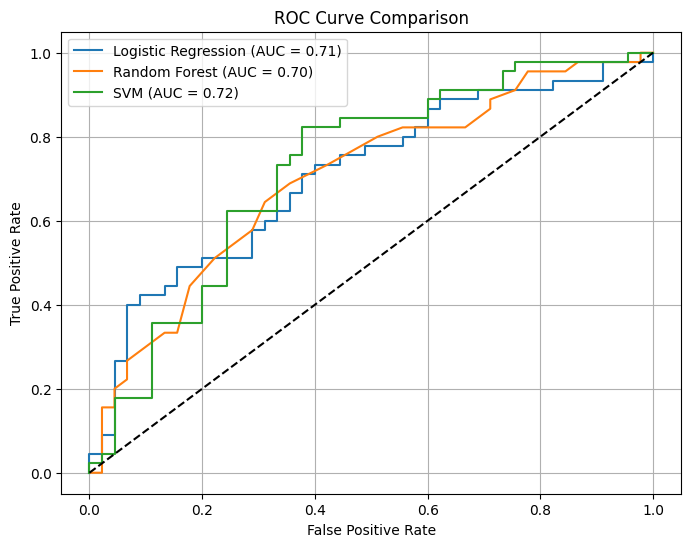

In [10]:
# STEP 5: ROC Curve Plot
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.savefig("C:/Users/sanja/cfDNA_LungCancer_ML/results/plots/roc_curve_all_models.png", dpi=300, bbox_inches='tight')
plt.show()


### Step 6: Confusion Matrix Visualization

In this section, we visualize the **confusion matrices** for all three models — Logistic Regression, Random Forest, and SVM. A confusion matrix helps us understand the number of **true positives**, **true negatives**, **false positives**, and **false negatives**, giving a clearer picture of the model's classification performance beyond accuracy. These matrices are saved as image files in the results/plots directory for documentation and future reference.


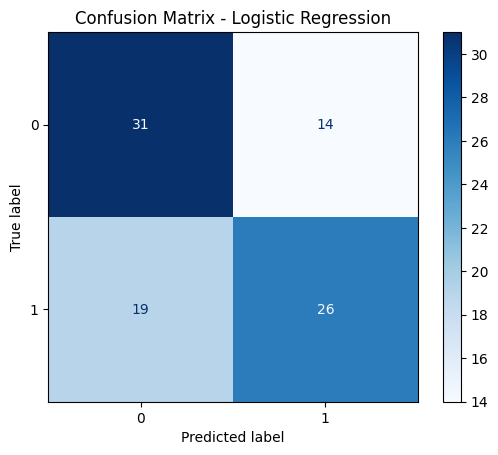

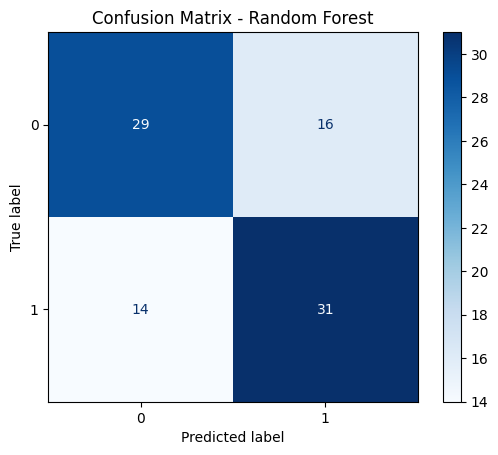

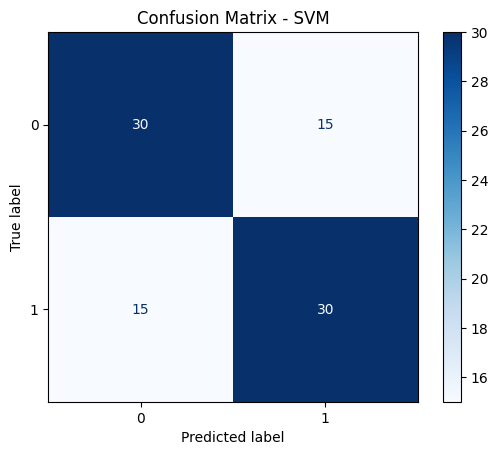

In [11]:

# STEP 1: Generate Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# STEP 2: Plot and Save Confusion Matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dictionary of model predictions
models = {
    'Logistic Regression': lr_pred,
    'Random Forest': rf_pred,
    'SVM': svm_pred
}

# Path to save plots
save_path = r"C:\Users\sanja\cfDNA_LungCancer_ML\results\plots"

# Generate and save confusion matrix plots
for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)

    # Clean file name
    filename = f"confusion_matrix_{name.lower().replace(' ', '_')}.png"
    full_path = f"{save_path}\\{filename}"

    plt.savefig(full_path, dpi=300, bbox_inches='tight')
    plt.show()


### Feature Importance Analysis

To understand which features contributed the most to the model's predictions, we extracted and visualized the top 20 features from the trained Random Forest model. This helps in interpreting the biological significance of certain miRNAs and methylation sites in lung cancer detection.


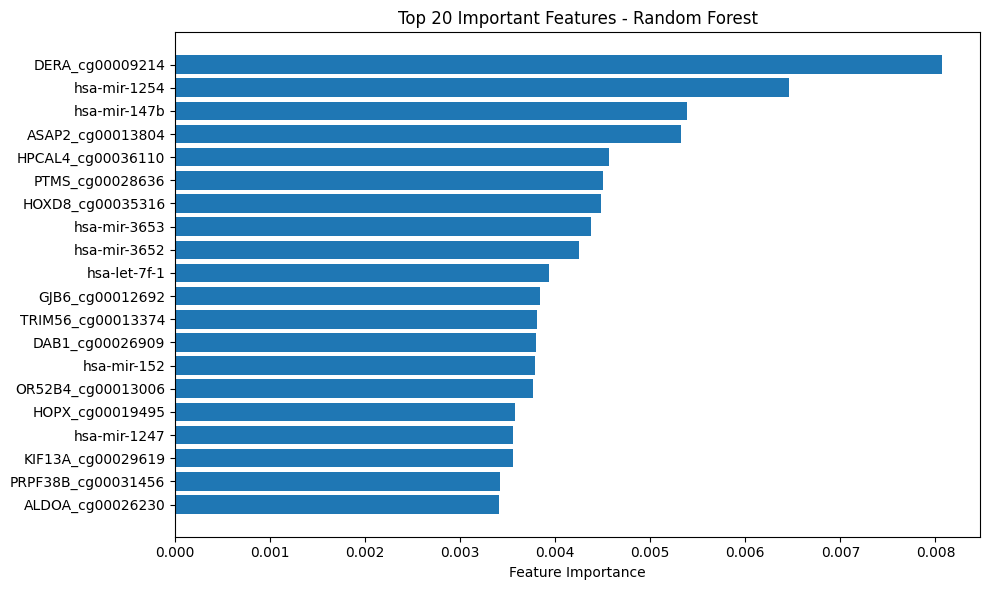

In [12]:
# STEP 7: Feature Importance Plot (Random Forest)
import numpy as np
import matplotlib.pyplot as plt

# If you still have access to the unscaled 'X' DataFrame
feature_names = X.columns  # Make sure 'X' is defined above

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 important features

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 20 Important Features - Random Forest")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.tight_layout()

# Save
plt.savefig(r"C:\Users\sanja\cfDNA_LungCancer_ML\results\plots\feature_importance_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()



### Model Classification Reports

We generate and display classification reports for each model, including precision, recall, F1-score, and support for both classes. This allows a detailed evaluation of model performance in classifying tumor and normal samples.


In [17]:
# STEP 8: Classification Reports
for name, preds in models.items():
    print(f"\n{name} Report:\n")
    print(classification_report(y_test, preds))



Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        45
           1       0.65      0.58      0.61        45

    accuracy                           0.63        90
   macro avg       0.64      0.63      0.63        90
weighted avg       0.64      0.63      0.63        90


Random Forest Report:

              precision    recall  f1-score   support

           0       0.67      0.64      0.66        45
           1       0.66      0.69      0.67        45

    accuracy                           0.67        90
   macro avg       0.67      0.67      0.67        90
weighted avg       0.67      0.67      0.67        90


SVM Report:

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        45
           1       0.67      0.67      0.67        45

    accuracy                           0.67        90
   macro avg       0.67      0.67      0.67        90
weight

### Saving Trained Models and Preprocessing Objects

To ensure reproducibility and enable future inference, we save the trained machine learning models (Logistic Regression, Random Forest, SVM) along with the preprocessing tools (Standard Scaler and Imputer) using `joblib`. These files can later be loaded into deployment environments (e.g., Streamlit apps) without retraining.


In [19]:
# STEP 9: Save Models
joblib.dump(lr_model, r"C:/Users/sanja/cfDNA_LungCancer_ML/models/logistic_model.pkl")
joblib.dump(rf_model, r"C:/Users/sanja/cfDNA_LungCancer_ML/models/random_forest_model.pkl")
joblib.dump(svm_model, r"C:/Users/sanja/cfDNA_LungCancer_ML/models/svm_model.pkl")
joblib.dump(scaler, r"C:/Users/sanja/cfDNA_LungCancer_ML/models/scaler.pkl")
joblib.dump(imputer, r"C:/Users/sanja/cfDNA_LungCancer_ML/models/imputer.pkl")


['C:/Users/sanja/cfDNA_LungCancer_ML/models/imputer.pkl']